# Random  Forest

#### 앙상블 학습(Ensemble Learning)

- 앙상블(ensemble)은 여러 머신러닝 모델을 연결하여 더 강력한 모델을 만드는 기법

- 머신러닝에는 이런 종류의 모델이 많지만, 랜덤 포레스트random forest와 그래디언트 부스팅(gradient boosting) 결정 트리는 둘 다 모델을 구성하는 기본 요소로 결정 트리를 사용 <br>
(두 앙상블 모델이 분류와 회귀 문제의 다양한 데이터 셋에서 효과적이라고 입증)


앙상블 학습을 통한 분류기

- 여러 개의 분류기(Classifier)를 생성하고 그 예측을 결합아여 보다 정확한 최종 예측을 도출하는 기법

앙상블 학습의 유형 : 보팅(Voting), 배깅(Bagging), 부스팅(Boosting), 스태킹(Stacking)

- 보팅(Voting) : 서로 다른 알고리즘을 가진 분류기를 결합
- 배깅(Bagging) : 모두 같은 유형의 알고리즘 기반, 데이터 샘플링을 서로 다르게 가져가면서 학습을 수행
- 부스팅(Boosting) : 여러 개의 분류기가 순차적으로 학습을 수행하되, 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해서 올바르게 예측할 수 있도록 다음 분류기에게 가중치(weight)를 부여하면서 학습과 예측을 진행
- 스태킹(Stacking) : 양상블에 속한 모든 예측기의 예측을 취합하는 간단한 함수를 사용하는 대신 취합하는 모델을 훈련하여 진행
 - 예측을 입력으로 받아 최종 예측하는 예측기를 블렌더(blender) 또는 메타학습기(meta learner)이라고 함

<center>
 <img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fk.kakaocdn.net%2Fdn%2FbCmIoE%2Fbtqy0RW3DBW%2Fcu6uK7BXlJ5KBUZSmz7R0K%2Fimg.png" alt="보팅과 배깅" width="60%" />

</center>

보팅 유형 - 하드 보팅(Hard Voting)과 소프트 보팅(Soft Voting)

<center>
 <img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fk.kakaocdn.net%2Fdn%2FbBEckS%2Fbtqy1I6b5Nk%2FH9U9w6fVBCvsY8PX8F2Zok%2Fimg.png" alt="보팅 유형" width="60%" />

</center>

#### 보팅 분류기(Voting Classifier)

[VotingClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html)

In [1]:
# 필요한 모듈과 데이터 불러오기
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from warnings import filterwarnings
filterwarnings('ignore')

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [2]:
# 보팅 적용을 위한 개별 모델은 로지스틱 회귀와 KNN입니다.
logistic_regression = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=8)

# 개별모델을 소프트보팅 기반의 앙상블 모델로 구현한 분류기
# VotingClassifier(estimators=[(),(),()], voting='soft')

voting_model = VotingClassifier(estimators=[ ('LogisticRegression', logistic_regression),
                                            ('KNN', knn) ], voting='soft')

# 데이터를 훈련셋과 테스트셋으로 나누기
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    test_size=0.2,
                                                    random_state=156)

# 보팅 분류기의 학습/예측/평가
voting_model.fit(X_train, y_train)
pred = voting_model.predict(X_test)
print('보팅 분류기의 정확도: {0: .4f}'.format(accuracy_score(y_test, pred)))

# 개별 모델의 학습/예측/평가
classifiers = [logistic_regression, knn]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

보팅 분류기의 정확도:  0.9474
LogisticRegression 정확도: 0.9386
KNeighborsClassifier 정확도: 0.9386


- 보팅 분류기의 정확도가 각 개별 모델의 정확도보다 조금 높게 나타남
- 여러 알고리즘을 결합한다고 항상 성능이 향상되는 것은 아님

#### 랜덤 포레스트

- 결정트리의 단점 : 과적합 문제

- 현재의 랜덤포레스트 개념은 2001년 레오 브레이먼에 의해 만들어짐

- 분류 및 회귀 분석에 사용되는 앙상블 학습 방법의 일종으로 훈련 과정에서 구성한 다수의 결정 트리(Forest)들을 임의적(Random)으로 학습하여 분류 또는 평균 예측(회귀 분석)를 출력

- 다수의 결정트리를 구성하는 학습단계와 입력 벡터가 들어왔을 때 분류하거나 예측하는 테스트 단계로 구성

- 각각의 트리가 독립적으로 학습하므로 학습 과정을 병렬화할 수 있음

- 일반적으로 의사결정트리보다 성능이 좋으며 (Tree Correlation 문제 해결) 파라미터 수가 적어 튜닝도 비교적 간단함

 - Tree Correlation 문제 : 특정 feature가 정답에 많은 영향을 줄 때 모든 tree들이 비슷한 결과를 도출하는 문제

- 타킷 예측을 잘하고 구별되는 어러 개의 트리를 만들기 위해 무작위성을 부여
 - 배깅(Bagging)의 대표적인 알고리즘

- 랜덤 트리 생성 방법

  (1) 트리를 만들 때 사용하는 데이터 포인트를 무작위로 선택하는 방법
  
  (2) 분할 테스트에서 특성을 무작위로 선택하는 방법

#### 랜덤 포레스트 만들기

- 랜덤 포레스트 모델을 만들려면 생성할 트리의 개수를 정해야 함 <br>
 (RandomForestRegressor나 RandomForestClassifier의 n_estimators 매개변수)


1. 트리를 만들기 위해 먼저 데이터의 부트스트랩 샘플bootstrap sample을 생성

 - n_samples개의 데이터 포인트 중에서 무작위로 데이터를 n_samples 횟수만큼 반복 추출

 - 부스스트랩 샘플의 예 ( [‘a’, ‘b’, ‘c’, ‘d’]에서 부트스트랩 샘플을 만든다고 하면)
  >  [‘b’, ‘d’, ‘d’, ‘c’] ,  [‘d’, ‘a’, ‘d’, ‘a’], [‘a’, ‘a’, ‘c’, ‘b’] 등

  - 배깅(Bagging)은 bootstrap aggregating의 줄임말로 통계학에서는 중복을 허용한 리샘플링(resampling)을 부트스트래핑(bootstrapping)이라고 함

2. 생성한 데이터 셋으로 트리를 만듬

 - 전체 데이터 셋 대상이 아닌 무작위로 선택한 데이터 셋 중에서 최선의 데이터 셋을 찾음
 - <font color=blue>몇 개의 특성을 고를 지 선택 -> max_features</font>
 - <font color=blue>몇 개의 트리를 만들 지 선택 -> n_estimators</font>
 -  max_features=1로 설정하면 트리의 분기는 테스트할 특성을 고를 필요가 없게 되며 무작위로 선택한 특성의 임계값을 찾기만 하면 됨

 - max_features 값을 크게 하면 랜덤 포레스트의 트리들은 매우 비슷해지고 가장 두드러진 특성을 이용해 데이터에 잘 맞춰짐

 - max_features를 낮추면 랜덤 포레스트 트리들은 많이 달라지고 각 트리는 데이터에 맞추기 위해 깊이가 깊어지게 됨

3. 모델에 있는 모든 트리의 예측을 만듬

 -  회귀의 경우에는 이 예측들을 평균하여 최종 예측을 만듬
 
 - 분류의 경우는 약한 투표 전략을 사용 -> 각 알고리즘은 가능성 있는 출력 레이블의 확률을 제공함으로써 간접적인 예측하고 트리들이 예측한 확률을 평균내어 가장 높은 확률을 가진 클래스가 예측값이 됨

[RandomForestClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
```
RandomForestClassifier(n_estimators, criterion, max_depth, min_samples_split, min_samples_leaf, min_weight_fraction_leaf, max_features, max_leaf_nodes, min_impurity_decrease, min_impurity_split, bootstrap, oob_score, n_jobs, random_state, verbose, warm_start, class_weight)
```
- <font color=blue>n_estimators : 숲의 나무의 수, 생성할 트리의 개수</font>
- criterion : 분할 품질을 측정하는 기능 (default : gini)
- max_depth : 트리의 최대 깊이
- min_samples_split : 내부 노드를 분할하는데 필요한 최소 샘플 수 (default : 2)
- min_samples_leaf : 리프 노드에 있어야 할 최소 샘플 수 (default : 1)
- min_weight_fraction_leaf : min_sample_leaf와 같지만 가중치가 부여된 샘플 수에서의 비율
- <font color=blue>max_features : 각 노드에서 분할에 사용할 특징의 최대 수</font>
- max_leaf_nodes : 리프 노드의 최대수
- min_impurity_decrease : 최소 불순도
- min_impurity_split : 나무 성장을 멈추기 위한 임계치
- **bootstrap : 부스트랩 사용 여부**
- **oob_score : 일반화 정확도를 줄이기 위해 밖의 샘플 사용 여부**
- **n_jobs :적합성과 예측성을 위해 병렬로 실행할 작업 수**
- random_state : 난수 seed 설정
- verbose : 실행 과정 출력 여부
- warm_start : 이전 호출의 솔루션을 재사용하여 합계에 더 많은 견적가를 추가
- class_weight : 클래스 가중치

In [3]:
# !pip install mglearn

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import mglearn

# 데이터 로드
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    random_state=42)

In [5]:
# 모델 학습
model = RandomForestClassifier(n_estimators=5, random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

- 랜덤 포레스트 안에 만들어진 트리는 estimators_ 속성에 저장



각 트리에서 학습된 결정 경계와 이를 취합해 만든 결정 경계 시각화

- 다섯 개의 랜덤한 결정 트리의 결정 경계와 예측한 확률을 평균내어 만든 결정 경계

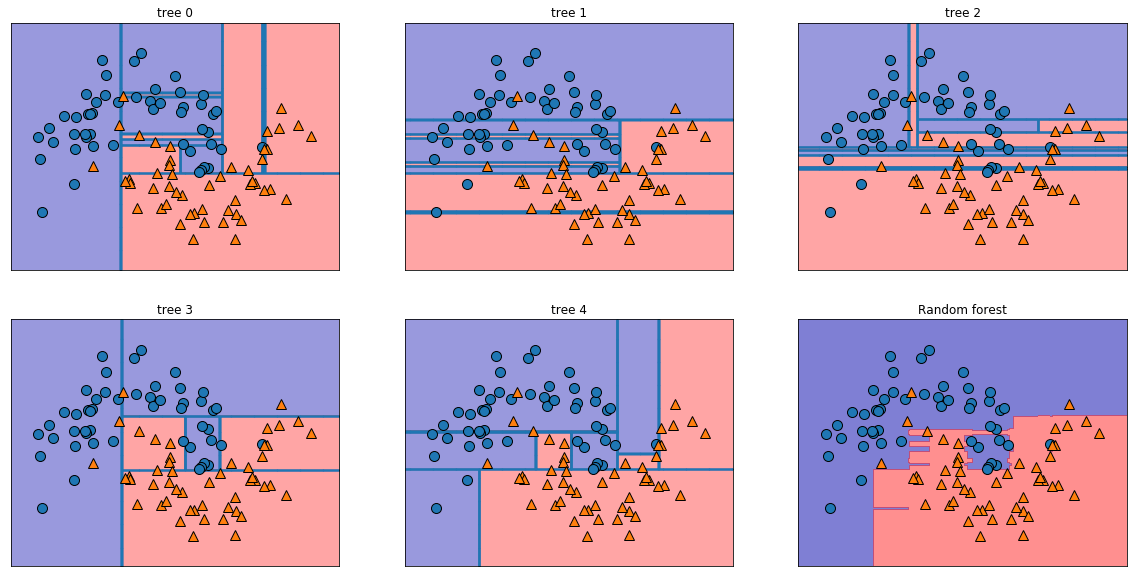

In [6]:
# 결정 경계 시각화
# 다섯 개의 결정트리 결정 경계
fig, axes = plt.subplots(2, 3, figsize=(20,10) )
for i, (ax, tree) in enumerate( zip( axes.ravel(), model.estimators_ ) ):
    ax.set_title("tree {}".format(i) )
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

# 랜덤포레스트로 만들어진 결정경계
axes[-1, -1].set_title("Random forest")
mglearn.plots.plot_2d_separator(model, X, fill=True, alpha=0.5, ax=axes[-1,-1] )
mglearn.discrete_scatter(X[:,0], X[:,1], y)

- 랜덤 포레스트는 개개의 트리보다는 덜 과대적합되고 훨씬 좋은 결정 경계를 만들어줌
- 실제 애플리케이션에서는 매우 많은 트리를 사용하기 때문에(수백, 수천 개) 더 부드러운 결정 경계가 만들어짐

#### Random Forest 실습 01

- 유방암 데이터셋에 100개의 트리로 이뤄진 랜덤 포레스트를 적용

In [7]:
from sklearn.datasets import load_breast_cancer

# 데이터 로드
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    random_state=66)

# 모델 학습
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

# 평가
print("훈련 세트 정확도: {:.3f}".format(model.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(model.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.979


- 랜덤 포레스트는 아무런 매개변수 튜닝 없이도 선형 모델이나 단일 결정 트리보다 높은 97% 정확도를 냄

- 단일 결정 트리에서 한 것처럼 max_features 매개변수를 조정하거나 사전 가지치기를 할 수도 있음

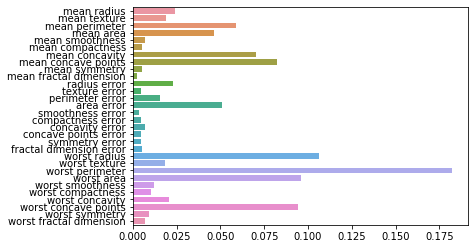

In [8]:
# 특성 중요도 시각화
import seaborn as sns
sns.barplot(model.feature_importances_, y=cancer.feature_names)

- 단일 트리의 경우보다 훨씬 많은 특성이 0 이상의 중요도 값을 가짐
- 단일 트리의 결과와 마찬가지로 랜덤 포레스트도 “worst radius” 특성이 매우 중요하다고 보지만, 가장 많은 정보를 가진 특성으로는 “worst perimeter”를 선택
- 회귀와 분류에 있어서 랜덤 포레스트는 현재 가장 널리 사용되는 머신러닝 알고리즘
- 랜덤 포레스트는 성능이 매우 뛰어나고 매개변수 튜닝을 많이 하지 않아도 잘 작동하며 데이터의 스케일을 맞출 필요도 없음

#### Random Forest 실습 02

붓꽃 데이터 랜덤포레스트를 만들기

In [9]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# 데이터 로드
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data,
                                                    iris.target,
                                                    test_size=0.2,
                                                    random_state=11)

# 모델 학습
model = RandomForestClassifier(n_estimators=10, random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [10]:
# 평가
print("훈련 세트 정확도: {:.3f}".format(model.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(model.score(X_test, y_test)))

훈련 세트 정확도: 0.992
테스트 세트 정확도: 0.933


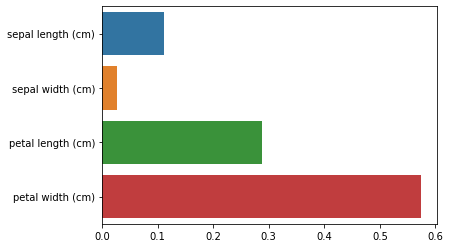

In [11]:
# 특성 중요도 시각화
import seaborn as sns
sns.barplot(model.feature_importances_, y=iris.feature_names)

##### 랜덤포레스트 성능향상

- iris 데이터가 간단하고 size가 작기 때문에 성능향상은 없으나 max_features와 oob_score를 적용해 보고 
- 특성 중요도의 변화를 확인해 본다.


oob_score

- 샘플링에 중복을 허용하는 배깅(Bagging) 방식을 사용하면 어떤 샘플은 여러번 샘플링되고 어떤 것은 전혀 선택되지 않을 수 있음
- 평균적으로 각 예측기에 훈련 샘플의 63% 정도만 샘플링
- oob(out-of-bag) : 선택되지 않은 훈련 샘플의 나머지 37% <br>
(예측기 마다 남겨진 37%는 모두 다름)
- oob_score=True로 지정하면 훈련이 끝난 후 자동으로 oob 샘플을 사용해 평가를 수행 

훈련 세트 정확도: 0.992
테스트 세트 정확도: 0.933
OOB 샘플의 정확도: 0.958


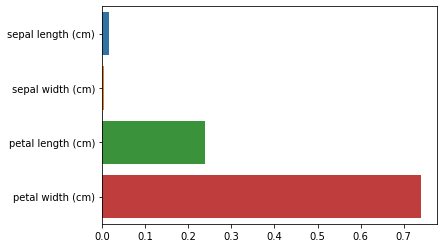

In [12]:
# 모델 학습
model = RandomForestClassifier(n_estimators=10, random_state=0,
                              max_features=4, oob_score=True)
model.fit(X_train, y_train)

# 평가
print("훈련 세트 정확도: {:.3f}".format(model.score(X_train, y_train)) )
print("테스트 세트 정확도: {:.3f}".format(model.score(X_test, y_test)) )
print("OOB 샘플의 정확도: {:.3f}".format(model.oob_score_) )

# 특성 중요도 시각화
sns.barplot(model.feature_importances_, y=iris.feature_names)

#### 장단점

- 결정트리의 단점을 보완하고 장점은 그대로 가지고 있는 모델이어서 별다른 조정 없이도 괜찮을 결과를 만들어낸다.
- 트리가 여러 개 만들어지기 때문에 비전문가에게 예측과정을 보여주기는 어렵다.
- 랜덤하게 만들어지기 때문에 random_state를 고정해야 같은 결과를 볼 수 있다.
- 텍스트 데이터와 같은 희소한 데이터에는 잘 동작하지 않는다.
- 큰 데이터 세트에도 잘 동작하지만 훈련과 예측이 상대적으로 느리다.
- 트리 개수가 많아질 수록 시간이 더 오래 걸린다.
